# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**Our goal is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

---
---





## Part One: Understanding the Background and Data


**For more, Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----


### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Import any libraries you think you will use:**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
import warnings
warnings.filterwarnings("ignore")

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.



In [70]:
fandango = pd.read_csv("fandango_scrape.csv")

In [71]:
fandango.head(5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [72]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [73]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

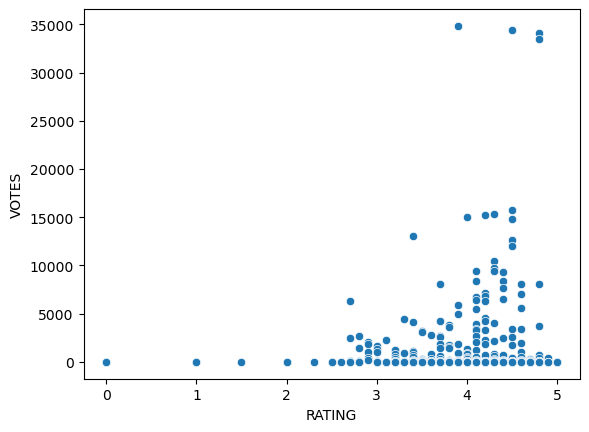

In [74]:
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [75]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [76]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [77]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [78]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

<Axes: xlabel='YEAR', ylabel='count'>

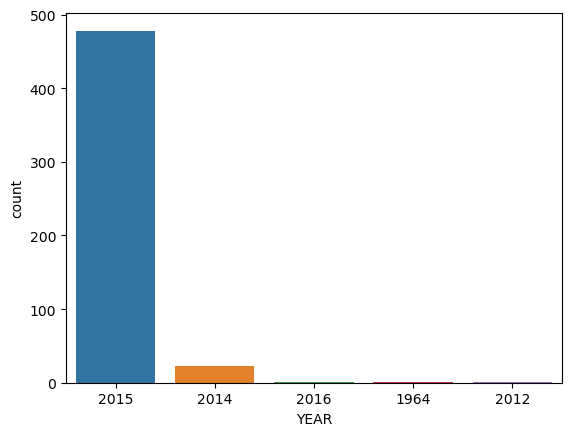

In [79]:
sns.countplot(data=fandango,x='YEAR')

In [80]:
fandango.sort_values(by='VOTES',ascending=False)[0:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [81]:
(fandango['VOTES'] == 0).sum()

69

In [82]:
abc = fandango[fandango['VOTES'] > 0]

In [83]:
len(fandango[fandango['VOTES'] == 0])
abc

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

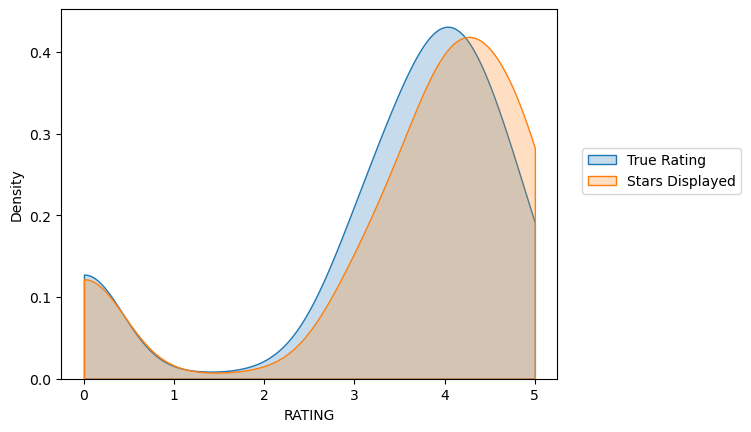

In [84]:
sns.kdeplot(x='RATING',data=fandango,clip=[0,5],fill=True,label="True Rating")
sns.kdeplot(x='STARS',data=fandango,clip=[0,5],fill=True,label="Stars Displayed")
plt.legend(loc=(1.05,0.5))

In [85]:
abc

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


In [86]:
abc['STARS_DIFF']=(fandango['STARS']-fandango['RATING'])
abc['STARS_DIFF'] = abc['STARS_DIFF'].round(2)

<Axes: xlabel='STARS_DIFF', ylabel='count'>

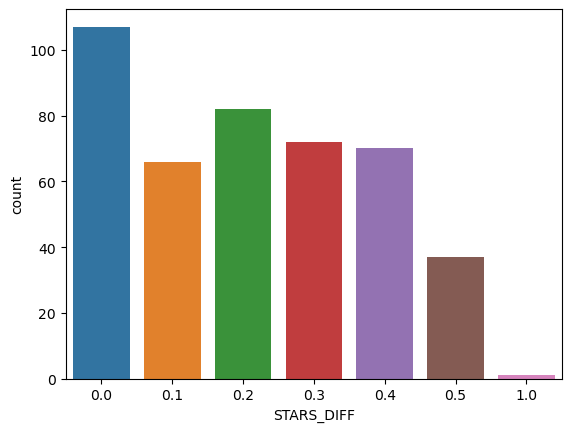

In [87]:
sns.countplot(x='STARS_DIFF',data=abc)

In [88]:
abc[abc['STARS_DIFF'] == 1.0] #We can see from the plot that one movie was displaying over a 1 star difference than its true rating!

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.



In [89]:
import pandas as pd
df = pd.read_csv("all_sites_scores.csv")

In [90]:
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [92]:
df.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [93]:
df.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 



<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

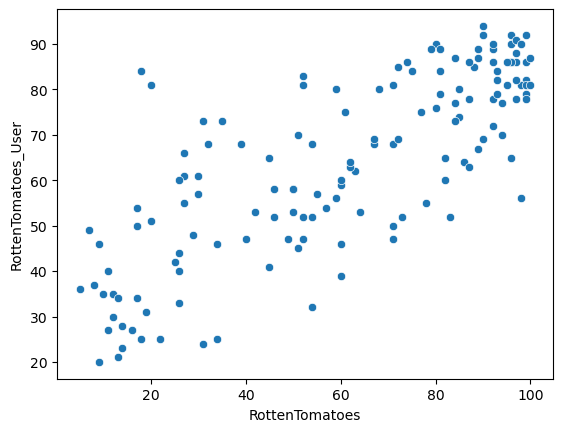

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y='RottenTomatoes_User',x='RottenTomatoes',data=df)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.



In [95]:
df['Critics-User Score']=(df['RottenTomatoes']-df['RottenTomatoes_User'])

In [96]:
df['Critics-User Score']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Critics-User Score, Length: 146, dtype: int64

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [97]:
df['Critics-User Score'].abs().mean()

15.095890410958905

<Axes: xlabel='Critics-User Score', ylabel='Density'>

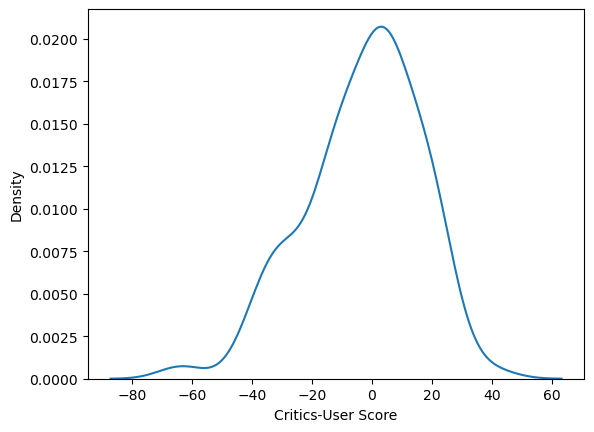

In [98]:
sns.kdeplot(x='Critics-User Score',data=df)

<Axes: xlabel='abs_diff', ylabel='Count'>

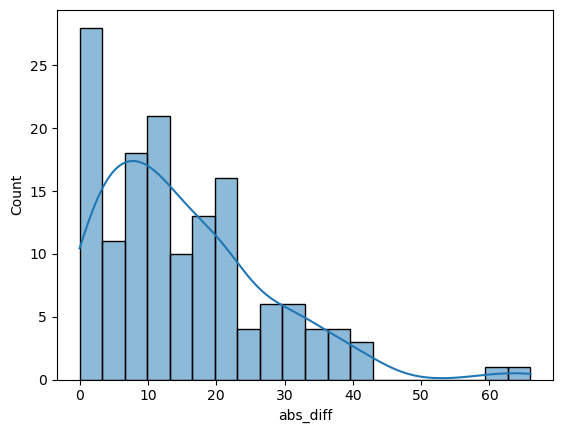

In [99]:
df['abs_diff'] = df['Critics-User Score'].abs()
sns.histplot(x='abs_diff',data=df,kde=True,bins=20)

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

In [100]:
df[['FILM','Critics-User Score']].sort_values(by='Critics-User Score')[0:5]

,FILM,Critics-User Score
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [101]:
df[['FILM','Critics-User Score']].sort_values(by='Critics-User Score',ascending=False)[0:5]

,FILM,Critics-User Score
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

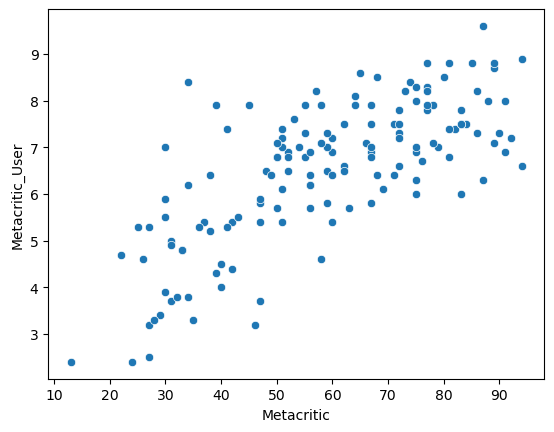

In [102]:
sns.scatterplot(data=df,x='Metacritic',y='Metacritic_User')

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.



<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

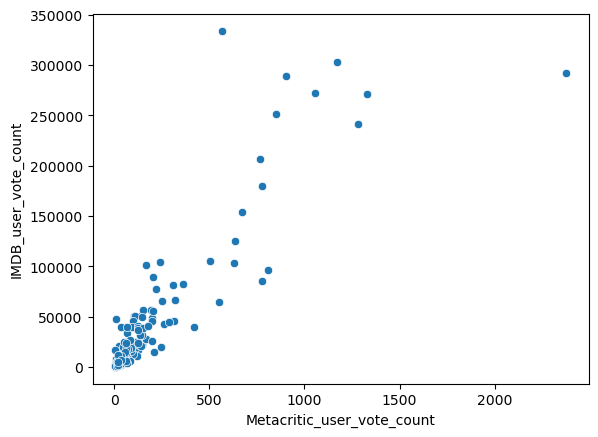

In [103]:
sns.scatterplot(x='Metacritic_user_vote_count',y='IMDB_user_vote_count',data=df)

In [104]:
df[df['IMDB_user_vote_count'] == df['IMDB_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Critics-User Score,abs_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [105]:
df[df['Metacritic_user_vote_count']==df['Metacritic_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Critics-User Score,abs_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [106]:
merged_df = pd.merge(how='inner',on='FILM',left=df,right=fandango)
merged_df

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Critics-User Score,abs_diff,STARS,RATING,VOTES,YEAR
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12,5.0,4.5,14846,2015
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5,5.0,4.5,12640,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10,5.0,4.5,12055,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66,5.0,4.5,1793,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14,3.5,3.0,1021,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,9,4.0,4.0,1348,2015
141,'71 (2015),97,82,83,7.5,7.2,60,24116,15,15,3.5,3.5,192,2015
142,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,19,3.5,3.5,118,2014
143,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,19,3.5,3.5,59,2015


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.



In [107]:
(df['RottenTomatoes']/20).round()

0      4.0
1      4.0
2      4.0
3      1.0
4      1.0
      ... 
141    4.0
142    5.0
143    5.0
144    5.0
145    4.0
Name: RottenTomatoes, Length: 146, dtype: float64

In [110]:
import numpy as np
merged_df['RT_Norm']=np.round(5/(100/df['RottenTomatoes']),2)
merged_df['RT_Norm']

0      3.70
1      4.25
2      4.00
3      0.90
4      0.70
       ... 
140    4.90
141    4.35
142    4.85
143    4.85
144    5.00
Name: RT_Norm, Length: 145, dtype: float64

In [111]:
merged_df['RTU_Norm']=np.round(5/(100/df['RottenTomatoes_User']),2)
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Critics-User Score,abs_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14


In [112]:
merged_df['Meta_Norm']=np.round(5/(100/df['Metacritic']),2)

In [113]:
merged_df['Meta_U_Norm']=np.round(5/(100/df['Metacritic_User']),2)

In [114]:
merged_df['IMDB_Norm']=np.round(df['IMDB']/2,2)
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Critics-User Score,abs_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14


In [115]:
df_norm_scores = merged_df[['RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','STARS','RATING']]

In [116]:
df_norm_scores

,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,STARS,RATING
0,3.70,4.30,3.30,0.36,3.90,5.0,4.5
1,4.25,4.00,3.35,0.38,3.55,5.0,4.5
2,4.00,4.50,3.20,0.40,3.90,5.0,4.5
3,0.90,4.20,1.10,0.24,2.70,5.0,4.5
4,0.70,1.40,1.45,0.17,2.55,3.5,3.0
...,...,...,...,...,...,...,...
140,4.90,4.50,4.70,0.45,4.30,4.0,4.0
141,4.35,3.90,3.35,0.40,3.70,3.5,3.5
142,4.85,4.10,4.15,0.38,3.60,3.5,3.5
143,4.85,3.90,4.45,0.44,3.70,3.5,3.5


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?




<Axes: ylabel='Density'>

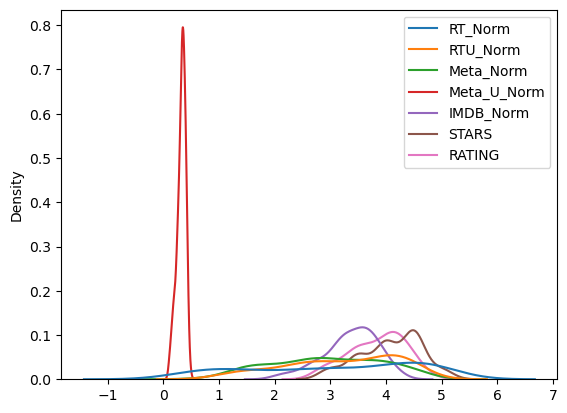

In [117]:
sns.kdeplot(data=df_norm_scores)

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 



<Axes: xlabel='RT_Norm', ylabel='STARS'>

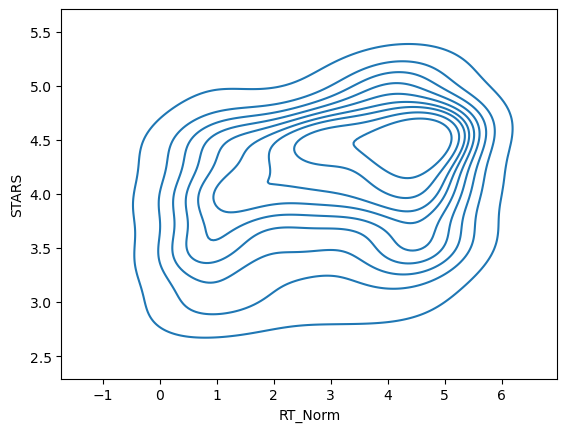

In [118]:
sns.kdeplot(x='RT_Norm',data=df_norm_scores,y='STARS')

**OPTIONAL TASK: Create a histplot comparing all normalized scores.**

<Axes: ylabel='Count'>

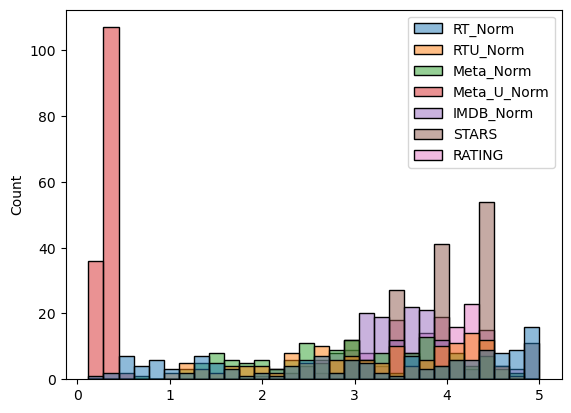

In [119]:
sns.histplot(data=df_norm_scores,bins=30)


### How are the worst movies rated across all platforms?



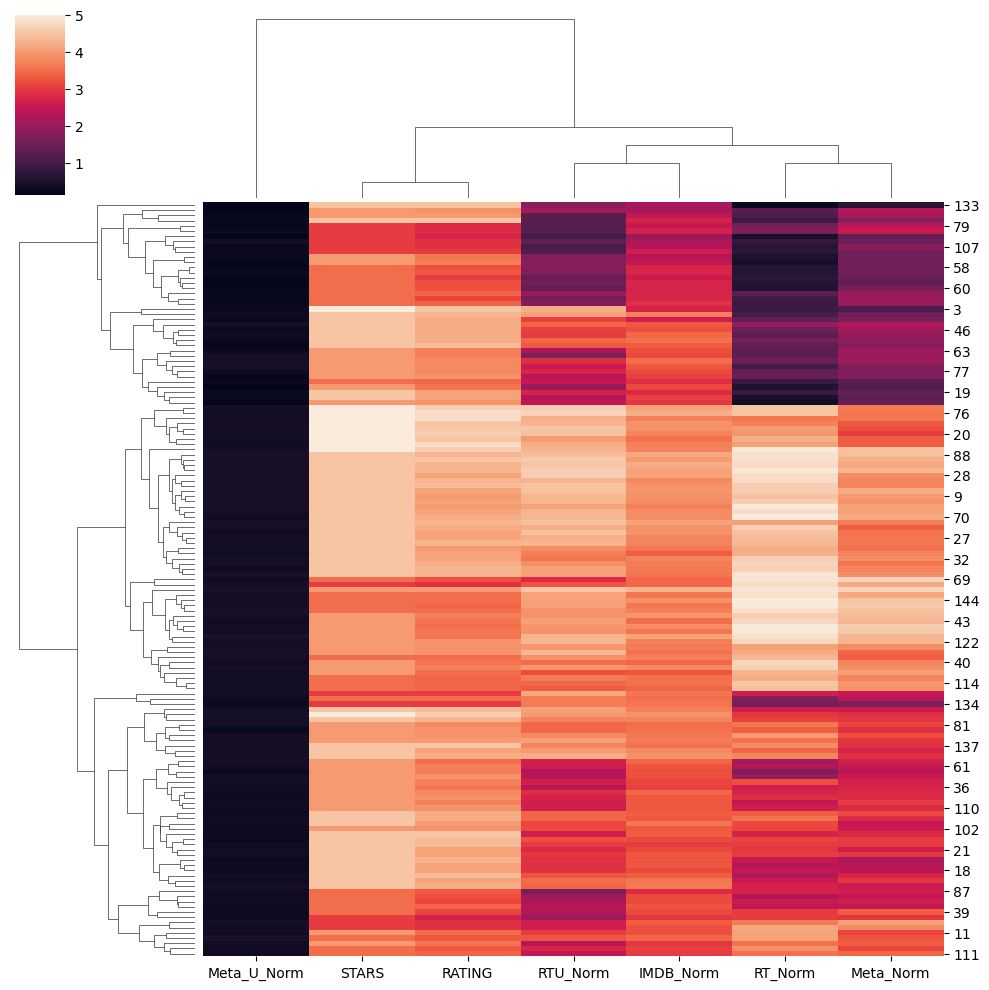

In [120]:
sns.clustermap(data=df_norm_scores)

In [121]:
df_norm_scores['FILM'] = merged_df['FILM']
df_norm_scores

,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,STARS,RATING,FILM
0,3.70,4.30,3.30,0.36,3.90,5.0,4.5,Avengers: Age of Ultron (2015)
1,4.25,4.00,3.35,0.38,3.55,5.0,4.5,Cinderella (2015)
2,4.00,4.50,3.20,0.40,3.90,5.0,4.5,Ant-Man (2015)
3,0.90,4.20,1.10,0.24,2.70,5.0,4.5,Do You Believe? (2015)
4,0.70,1.40,1.45,0.17,2.55,3.5,3.0,Hot Tub Time Machine 2 (2015)
...,...,...,...,...,...,...,...,...
140,4.90,4.50,4.70,0.45,4.30,4.0,4.0,Mr. Holmes (2015)
141,4.35,3.90,3.35,0.40,3.70,3.5,3.5,'71 (2015)
142,4.85,4.10,4.15,0.38,3.60,3.5,3.5,"Two Days, One Night (2014)"
143,4.85,3.90,4.45,0.44,3.70,3.5,3.5,Gett: The Trial of Viviane Amsalem (2015)


In [122]:
abc = df_norm_scores.sort_values(by='RT_Norm')[0:10]

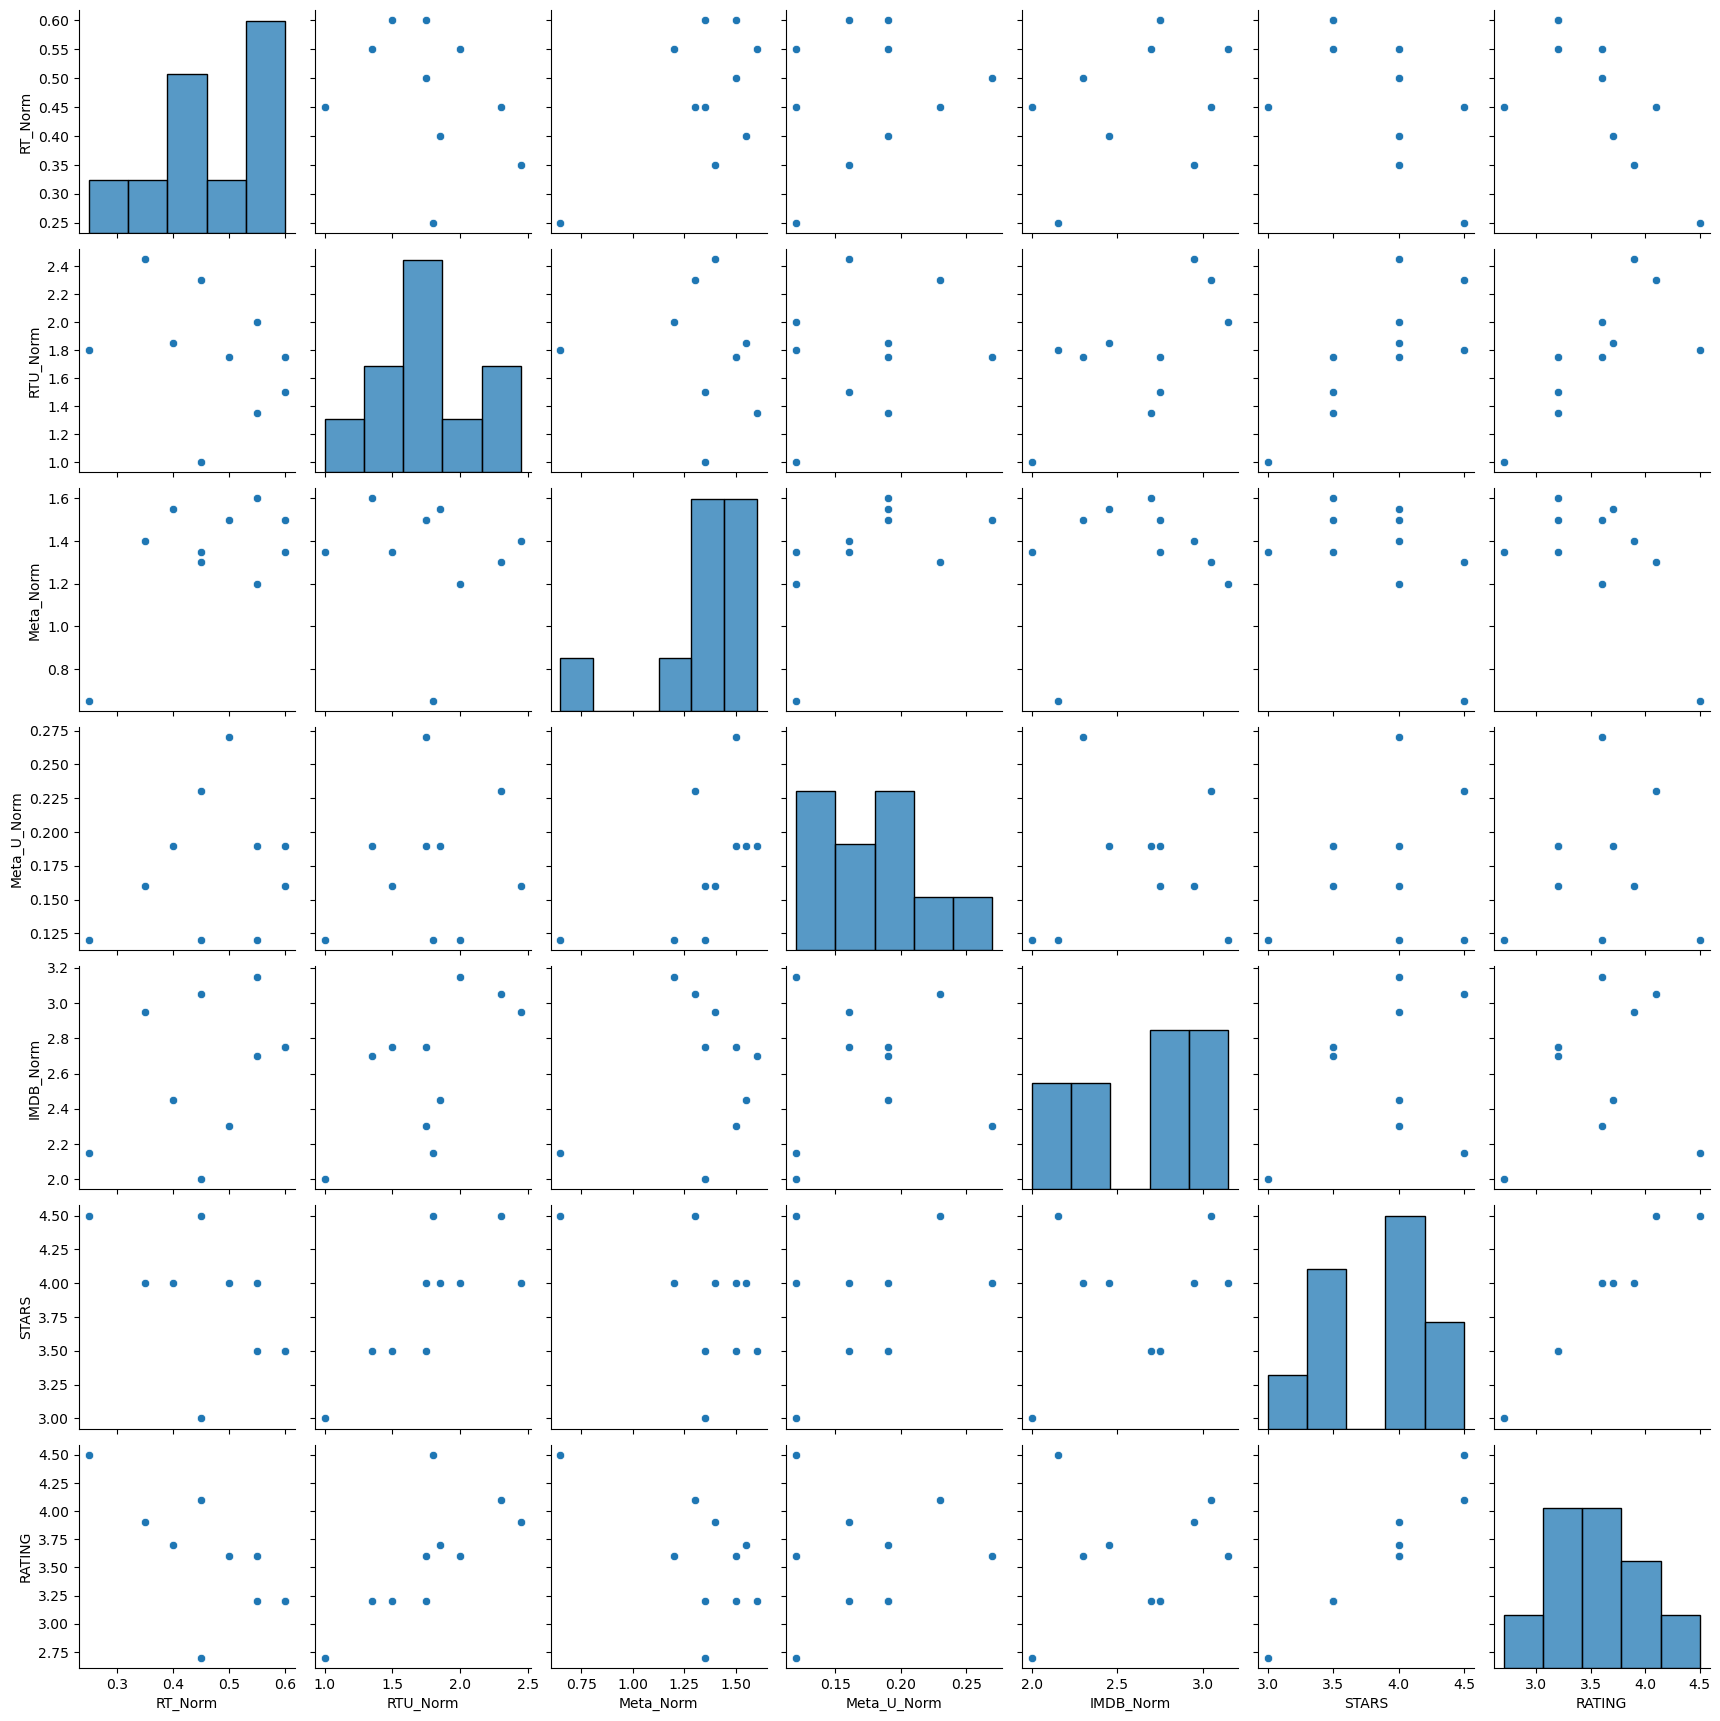

In [123]:
sns.pairplot(data=abc)

In [126]:
abc['AVERAGE'] = df_norm_scores['RT_Norm'] + df_norm_scores['RTU_Norm'] + df_norm_scores['Meta_Norm'] + df_norm_scores['Meta_U_Norm'] + df_norm_scores['IMDB_Norm']
abc['AVERAGE'] = abc['AVERAGE'] / 5

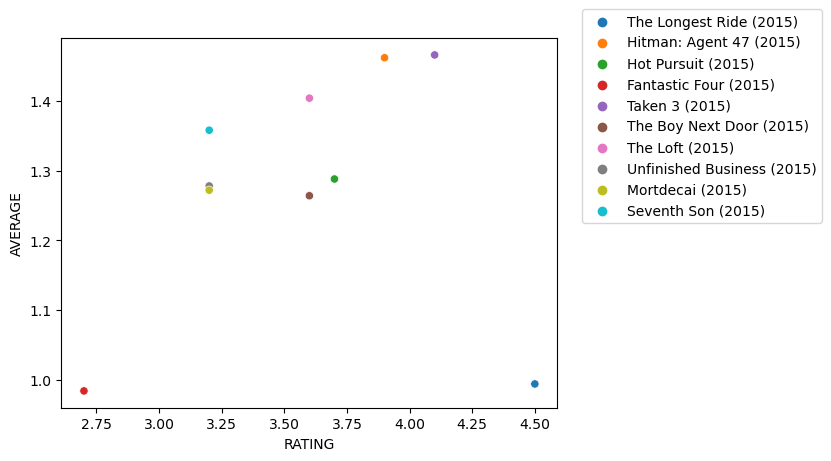

In [127]:
sns.scatterplot(data=abc,x='RATING',y='AVERAGE',hue='FILM')
plt.legend(loc=(1.05,0.5))

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [ ]:
#0.4+2.3+1.3+2.3+3

In [ ]:
#9.3/5 = 1.86

----